In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
env = gym.make("Taxi-v3").env

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.reset()

388

In [5]:
print("Observation Space : {}".format(env.observation_space))
print("Action Space      : {}".format(env.action_space))

Observation Space : Discrete(500)
Action Space      : Discrete(6)


In [6]:
state = env.encode(3,1,2,3)
print("State Number : ", state)

State Number :  331


In [7]:
env.s = state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
env.P[331]   
# probability, next_state, reward, done

{0: [(1.0, 431, -1, False)],
 1: [(1.0, 231, -1, False)],
 2: [(1.0, 351, -1, False)],
 3: [(1.0, 331, -1, False)],
 4: [(1.0, 331, -10, False)],
 5: [(1.0, 331, -10, False)]}

There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

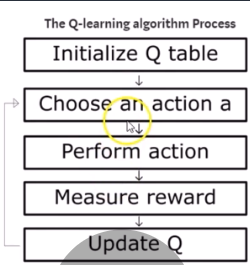

In [9]:
env.reset()

time_step = 0
total_reward = 0
while True:
    time_step = time_step + 1
    # Choose an action a
    action = env.action_space.sample() #.sample() 6 durumdan birisini rastgele seçtiriyor
    
    #Perform action
    state, reward, done, _ = env.step(action) #state = next_state
    
    #Measure reward
    total_reward = total_reward + reward
    
    if done:
        break

In [10]:
env.reset()

time_step = 0
total_reward = 0
list_visualize = []
while True:
    time_step = time_step + 1
    # Choose an action a
    action = env.action_space.sample() #.sample() 6 durumdan birisini rastgele seçtiriyor
    
    #Perform action
    state, reward, done, _ = env.step(action) #state = next_state
    
    #Measure reward
    total_reward = total_reward + reward
    
    #Visualize
    env.render()
    print("State        : {}".format(state))
    print("Action       : {}".format(action))
    print("Reward       : {}".format(reward))
    print("Total Reward : {}".format(total_reward))
    print("Time Step    : {}".format(time_step))
    
    
    if done:
        break

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State        : 128
Action       : 0
Reward       : -1
Total Reward : -1
Time Step    : 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State        : 108
Action       : 3
Reward       : -1
Total Reward : -2
Time Step    : 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State        : 208
Action       : 0
Reward       : -1
Total Reward : -3
Time Step    : 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
State        : 228
Action       : 2
Reward       : -1
Total Reward : -4
Time Step    : 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State        : 328
Action       : 0
Reward       : -1
Total Reward : -5
Time Step    : 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (

In [11]:
print("Total Reward : ",total_reward)
print("Time Step : ",time_step)

Total Reward :  -737
Time Step :  209


In [12]:
total_reward_list = []
for i in range(5):
    env.reset()

    time_step = 0
    total_reward = 0
    list_visualize = []
    while True:
        time_step = time_step + 1
        # Choose an action a
        action = env.action_space.sample() #.sample() 6 durumdan birisini rastgele seçtiriyor

        #Perform action
        state, reward, done, _ = env.step(action) #state = next_state

        #Measure reward
        total_reward = total_reward + reward

        if done:
            total_reward_list.append(total_reward)
            break

In [13]:
total_reward_list

[-11731, -13271, -3880, -3313, -1089]

# Q - Table

## Init Q - Table

In [14]:
# q_table = (observation_space x action_space)
q_table = np.zeros([env.observation_space.n,env.action_space.n])

## Hyperparameters

In [15]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1

## Plotting Matrix

In [16]:
reward_list = []
dropout_list = []

## Train

In [17]:
episode_number = 10000

for i in range(1,episode_number+1):
    # return init env
    env.reset()
    
    reward_count = 0
    dropout_count = 0
    while True:
        #exploit or explore to find axtion
        # %10 = explore , %90 = exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
            
        # action process and take reward / observation
        next_state, reward, done, _ = env.step(action)
        
        # Q Learning Function
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])
        
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        
        # Q Table update
        q_table[state,action] = next_value
        
        # update state
        state = next_state
        
        # Find wrong dropouts
        if reward == -10:
            dropout_count +=1 
        
        reward_count += reward
        if done:
            break
    
    if i%10 == 0:
        dropout_list.append(dropout_count)
        reward_list.append(reward_count)
        print("Episode {}, Reward {}, Wrong Dropout {}".format(i,reward_count,dropout_count))

Episode 10, Reward -719, Wrong Dropout 26
Episode 20, Reward -1831, Wrong Dropout 76
Episode 30, Reward -617, Wrong Dropout 17
Episode 40, Reward -471, Wrong Dropout 8
Episode 50, Reward -336, Wrong Dropout 8
Episode 60, Reward -287, Wrong Dropout 8
Episode 70, Reward -283, Wrong Dropout 9
Episode 80, Reward -143, Wrong Dropout 4
Episode 90, Reward -407, Wrong Dropout 21
Episode 100, Reward -278, Wrong Dropout 9
Episode 110, Reward -543, Wrong Dropout 24
Episode 120, Reward -166, Wrong Dropout 7
Episode 130, Reward -61, Wrong Dropout 2
Episode 140, Reward -327, Wrong Dropout 7
Episode 150, Reward -162, Wrong Dropout 4
Episode 160, Reward -437, Wrong Dropout 18
Episode 170, Reward -197, Wrong Dropout 7
Episode 180, Reward -151, Wrong Dropout 6
Episode 190, Reward -208, Wrong Dropout 7
Episode 200, Reward -94, Wrong Dropout 3
Episode 210, Reward -360, Wrong Dropout 11
Episode 220, Reward -342, Wrong Dropout 15
Episode 230, Reward -91, Wrong Dropout 3
Episode 240, Reward -18, Wrong Dropou

Episode 2440, Reward 0, Wrong Dropout 1
Episode 2450, Reward -1, Wrong Dropout 1
Episode 2460, Reward -6, Wrong Dropout 1
Episode 2470, Reward 6, Wrong Dropout 0
Episode 2480, Reward 2, Wrong Dropout 0
Episode 2490, Reward -4, Wrong Dropout 1
Episode 2500, Reward 5, Wrong Dropout 0
Episode 2510, Reward -8, Wrong Dropout 1
Episode 2520, Reward 10, Wrong Dropout 0
Episode 2530, Reward -4, Wrong Dropout 1
Episode 2540, Reward 4, Wrong Dropout 0
Episode 2550, Reward -3, Wrong Dropout 1
Episode 2560, Reward -11, Wrong Dropout 2
Episode 2570, Reward -4, Wrong Dropout 1
Episode 2580, Reward -8, Wrong Dropout 1
Episode 2590, Reward 4, Wrong Dropout 0
Episode 2600, Reward 10, Wrong Dropout 0
Episode 2610, Reward 2, Wrong Dropout 0
Episode 2620, Reward 3, Wrong Dropout 0
Episode 2630, Reward -9, Wrong Dropout 1
Episode 2640, Reward 11, Wrong Dropout 0
Episode 2650, Reward 11, Wrong Dropout 0
Episode 2660, Reward 8, Wrong Dropout 0
Episode 2670, Reward 5, Wrong Dropout 0
Episode 2680, Reward -29,

Episode 4720, Reward 4, Wrong Dropout 0
Episode 4730, Reward 3, Wrong Dropout 0
Episode 4740, Reward -2, Wrong Dropout 0
Episode 4750, Reward 5, Wrong Dropout 0
Episode 4760, Reward -8, Wrong Dropout 1
Episode 4770, Reward 7, Wrong Dropout 0
Episode 4780, Reward 3, Wrong Dropout 0
Episode 4790, Reward 6, Wrong Dropout 0
Episode 4800, Reward 9, Wrong Dropout 0
Episode 4810, Reward 5, Wrong Dropout 0
Episode 4820, Reward 5, Wrong Dropout 0
Episode 4830, Reward 5, Wrong Dropout 0
Episode 4840, Reward 8, Wrong Dropout 0
Episode 4850, Reward 8, Wrong Dropout 0
Episode 4860, Reward 7, Wrong Dropout 0
Episode 4870, Reward 3, Wrong Dropout 0
Episode 4880, Reward 5, Wrong Dropout 0
Episode 4890, Reward 8, Wrong Dropout 0
Episode 4900, Reward -6, Wrong Dropout 1
Episode 4910, Reward -35, Wrong Dropout 3
Episode 4920, Reward -3, Wrong Dropout 1
Episode 4930, Reward 5, Wrong Dropout 0
Episode 4940, Reward -19, Wrong Dropout 2
Episode 4950, Reward 4, Wrong Dropout 0
Episode 4960, Reward -5, Wrong D

Episode 7080, Reward -12, Wrong Dropout 2
Episode 7090, Reward -5, Wrong Dropout 1
Episode 7100, Reward 2, Wrong Dropout 0
Episode 7110, Reward 2, Wrong Dropout 0
Episode 7120, Reward -9, Wrong Dropout 1
Episode 7130, Reward -5, Wrong Dropout 1
Episode 7140, Reward -3, Wrong Dropout 1
Episode 7150, Reward 3, Wrong Dropout 0
Episode 7160, Reward 9, Wrong Dropout 0
Episode 7170, Reward -3, Wrong Dropout 1
Episode 7180, Reward 8, Wrong Dropout 0
Episode 7190, Reward 5, Wrong Dropout 0
Episode 7200, Reward -18, Wrong Dropout 2
Episode 7210, Reward 6, Wrong Dropout 0
Episode 7220, Reward 6, Wrong Dropout 0
Episode 7230, Reward 4, Wrong Dropout 0
Episode 7240, Reward 4, Wrong Dropout 0
Episode 7250, Reward 1, Wrong Dropout 0
Episode 7260, Reward 7, Wrong Dropout 0
Episode 7270, Reward -1, Wrong Dropout 1
Episode 7280, Reward 8, Wrong Dropout 0
Episode 7290, Reward 10, Wrong Dropout 0
Episode 7300, Reward -4, Wrong Dropout 1
Episode 7310, Reward -2, Wrong Dropout 1
Episode 7320, Reward -3, Wr

Episode 9150, Reward -6, Wrong Dropout 1
Episode 9160, Reward 4, Wrong Dropout 0
Episode 9170, Reward 4, Wrong Dropout 0
Episode 9180, Reward 8, Wrong Dropout 0
Episode 9190, Reward 9, Wrong Dropout 0
Episode 9200, Reward 7, Wrong Dropout 0
Episode 9210, Reward -16, Wrong Dropout 2
Episode 9220, Reward -6, Wrong Dropout 1
Episode 9230, Reward -5, Wrong Dropout 1
Episode 9240, Reward 8, Wrong Dropout 0
Episode 9250, Reward -7, Wrong Dropout 1
Episode 9260, Reward 11, Wrong Dropout 0
Episode 9270, Reward 8, Wrong Dropout 0
Episode 9280, Reward 6, Wrong Dropout 0
Episode 9290, Reward 6, Wrong Dropout 0
Episode 9300, Reward 3, Wrong Dropout 0
Episode 9310, Reward -4, Wrong Dropout 1
Episode 9320, Reward 9, Wrong Dropout 0
Episode 9330, Reward -9, Wrong Dropout 1
Episode 9340, Reward 5, Wrong Dropout 0
Episode 9350, Reward 7, Wrong Dropout 0
Episode 9360, Reward 8, Wrong Dropout 0
Episode 9370, Reward 3, Wrong Dropout 0
Episode 9380, Reward 10, Wrong Dropout 0
Episode 9390, Reward -7, Wrong

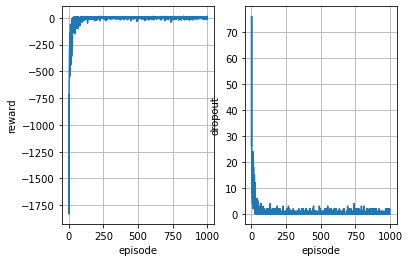

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].plot(reward_list)
ax[0].set_xlabel("episode")
ax[0].set_ylabel("reward")
ax[0].grid(True)

ax[1].plot(dropout_list)
ax[1].set_xlabel("episode")
ax[1].set_ylabel("dropout")
ax[1].grid(True)

## Yorum 

In [19]:
env.encode(0,0,3,4)

16

In [20]:
env.s = env.encode(0,0,3,4)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

In [21]:
q_table[16,:]

array([12.1402065 , 14.47964003, 11.75617224, 14.50474457,  5.64069673,
       17.47567612])

Başka bir örnek ile deneyelim

In [22]:
env.encode(3,2,4,3)

359

In [23]:
env.s = env.encode(3,2,4,3)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | :_| : |
|Y| : |B: |
+---------+
  (Dropoff)


In [24]:
q_table[359,:]

array([-1.08420144,  7.7690008 ,  0.07783308, -0.54400389, -1.98255983,
       -3.4292309 ])